$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/kerenmizrahi/.cache/torch/hub/ultralytics_yolov5_master


YOLOv5 🚀 2025-1-2 Python-3.8.12 torch-1.10.1 CPU



Fusing layers... 


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs


Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Look at the inference results and answer the question below.


inference output img 1:
image 1/1: 183x275 2 persons, 1 surfboard
Speed: 96.2ms pre-process, 63.1ms inference, 16.4ms NMS per image at shape (1, 3, 448, 640)
         xmin       ymin        xmax        ymax  confidence  class       name
0  100.262924  47.279018  187.846512  118.332085    0.902309      0     person
1   22.616245  20.941055  128.632294   92.211281    0.474625      0     person
2   86.475899  95.046036  138.136215  124.441322    0.365458     37  surfboard


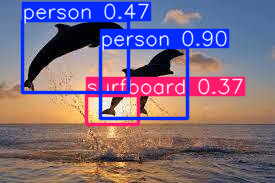

inference output img 2:
image 1/1: 750x750 2 cats, 1 dog
Speed: 29.5ms pre-process, 64.9ms inference, 0.7ms NMS per image at shape (1, 3, 640, 640)
         xmin        ymin        xmax        ymax  confidence  class name
0   11.464851  116.254036  313.465027  667.198914    0.650867     15  cat
1  363.661743  289.905182  750.000000  721.743103    0.502283     16  dog
2  311.703186  102.786751  594.888367  687.792969    0.389906     15  cat


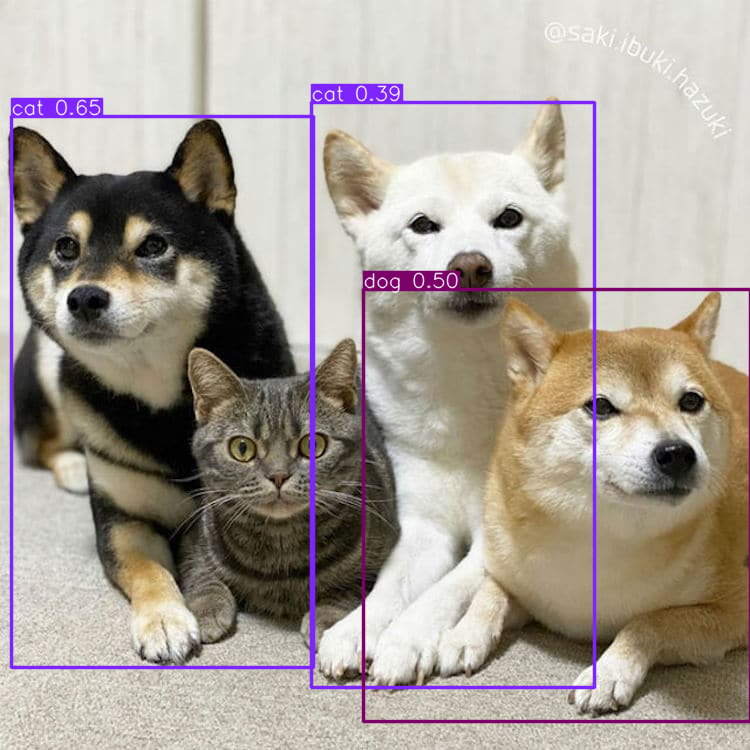

In [2]:
#Insert the inference code here.
with torch.no_grad():
    #Detecting objects using YOLOv5
    objs_img1 = model(img1)
    objs_img2 = model(img2)

    #Printing inference output1 with bounding boxes
    print('inference output img 1:')
    print(objs_img1)
    print(objs_img1.pandas().xyxy[0])
    objs_img1.show()

    #Printing inference output2 with bounding boxes
    print('inference output img 2:')
    print(objs_img2)
    print(objs_img2.pandas().xyxy[0])
    objs_img2.show()

### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures? with what confidance?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.
3. recall that we learned how to fool a model by adverserial attack (PGD), describe how you would attack an Object Detection model (such as YOLO).

In [3]:
#====
from cs236781.answers import display_answer
import hw2.answers
#====

display_answer(hw2.answers.part6_q1)


**Your answer:**
1. In img1, the model detected three of the dolphins but failed to classify them currectly. It classified two of the dolphins as "persons" with confidence scores of 0.47 and 0.90, while the third dolphin was classified as a "surfboard" with a confidence score of 0.37.
In img2, the model detected three dogs but misclassified them as other objects and failed to detect the cat entirely. Additionally, two of the dogs were misclassified as "cats" with confidence scores of 0.65 and 0.39, while only one dog was correctly classified as a "dog" with a confidence score of 0.50.

2. The model's failures can be attributed to the complexity of the images and/or overlapping objects.
In img1, two dolphins are overlapping, and there are water drops near the dolphin figures, which may add complexity to the image. Additionally, the dolphins are black against a lighter background, which might make classification more challenging.
In img2, the dogs and the cat are overlapping and close to each other. Also, the dogs’ ears may resemble cat ears, which might affect the model’s classification.
A suggestion to resolve these issues could be using advanced tools like the R-CNN family models as they are better at handling such scenarios (even though YOLO models are faster than R-CNN). Another suggestion could be manipulating the images, for example, adjusting the colors in the dolphins' image so they aren’t as dark.

3. To attack an object detection model like YOLO, we can use the Projected Gradient Descent (PGD) method. The process starts with a target image we want to fool. We add a small amount of noise to the image and adjust this noise step by step.
In each step, we check how the model’s predictions—like detected objects, bounding boxes, and classifications—change due to the noise. We use this feedback to modify the noise in a way that disrupts the model's accuracy while keeping the changes small enough that the image still looks the same to the human eye.
After repeating this process many times, we create a slightly altered image that appears unchanged to humans but causes the YOLO model to make mistakes, such as missing objects, misclassifying them, or drawing incorrect bounding boxes.



## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

inference output img 1:
image 1/1: 645x545 (no detections)
Speed: 21.3ms pre-process, 51.8ms inference, 0.5ms NMS per image at shape (1, 3, 640, 544)
Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []


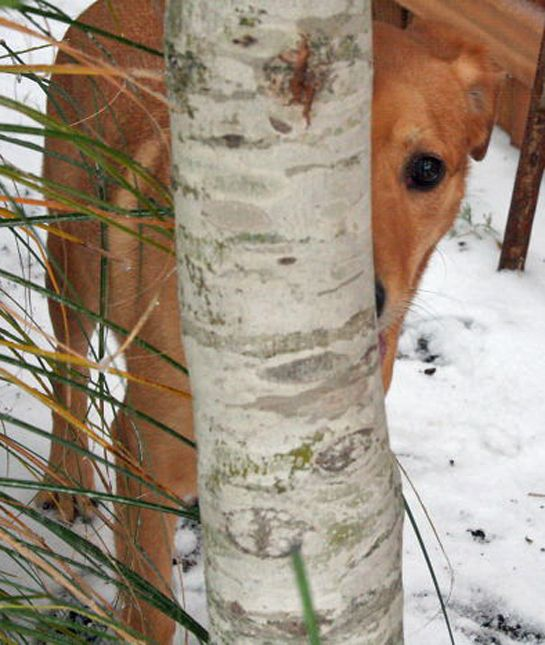

inference output img 2:
image 1/1: 981x736 1 person
Speed: 32.7ms pre-process, 44.9ms inference, 0.7ms NMS per image at shape (1, 3, 640, 480)
       xmin       ymin       xmax        ymax  confidence  class    name
0  77.26403  99.256157  641.32196  918.307983    0.743464      0  person


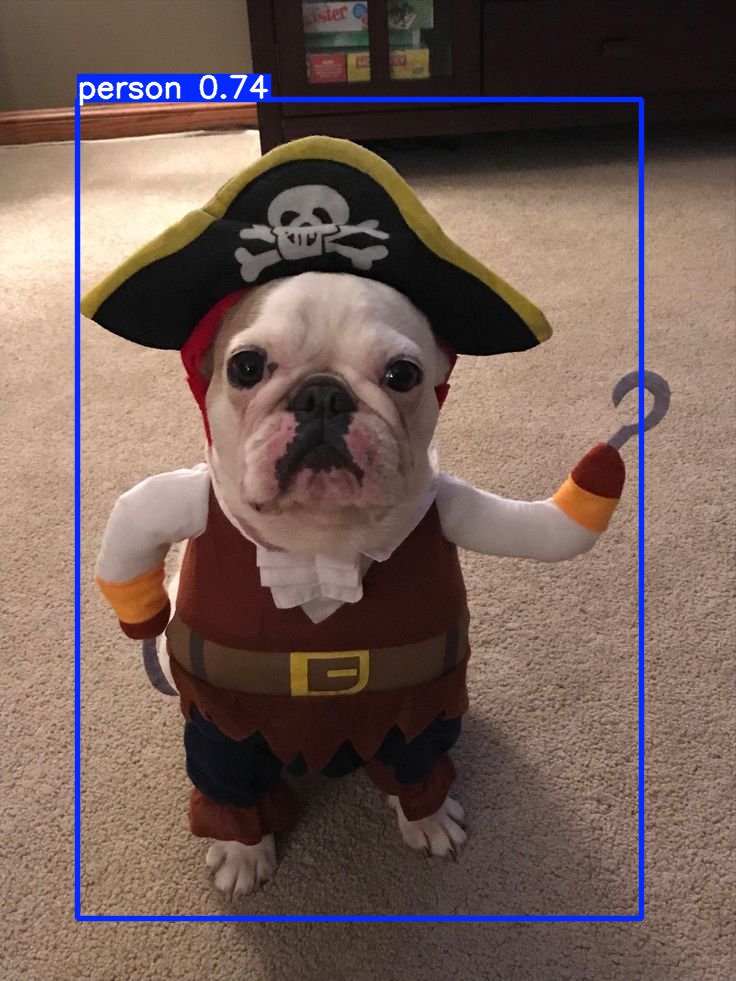

inference output img 3:
image 1/1: 419x369 1 cat
Speed: 22.8ms pre-process, 56.7ms inference, 0.7ms NMS per image at shape (1, 3, 640, 576)
        xmin       ymin        xmax        ymax  confidence  class name
0  28.745342  30.536592  331.648987  369.798309    0.252677     15  cat


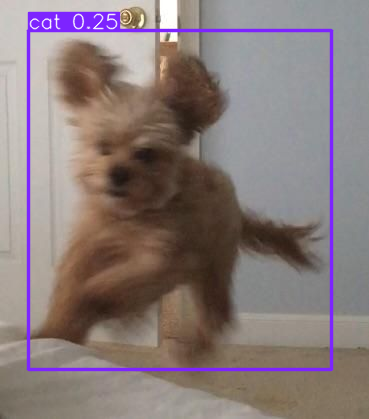

In [4]:
#Insert the inference code here.

img1 = 'imgs/dog_behind_tree.jpg' #Occlusion
img2 = 'imgs/dog_as_pirate.jpg'  #model bias
img3 = 'imgs/blurry_dog.jpg'  #Deformation

with torch.no_grad():
    #Detecting objects using YOLOv5
    objs_img1 = model(img1)
    objs_img2 = model(img2)
    objs_img3 = model(img3)
    
    #Printing inference output1 with bounding boxes
    print('inference output img 1:')
    print(objs_img1)
    print(objs_img1.pandas().xyxy[0])
    objs_img1.show()

    #Printing inference output2 with bounding boxes
    print('inference output img 2:')
    print(objs_img2)
    print(objs_img2.pandas().xyxy[0])
    objs_img2.show()

    #Printing inference output3 with bounding boxes
    print('inference output img 3:')
    print(objs_img3)
    print(objs_img3.pandas().xyxy[0])
    objs_img3.show()

### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [5]:
display_answer(hw2.answers.part6_q3)



**Your answer:**

1.
- <u>Picture One</u> - Dog Behind Tree: This picture is an example of **occlusion**, as the tree hides parts of the dog's features (half of its face and body). Additionally, the colors behind the dog may make it harder to detect the dog's ear. Since this presentation lacks important features that a dog typically has, the model struggled to detect the dog as an object (or even objects overall).

- <u>Picture Two</u> - Dog as a Pirate: This picture is an example of **model bias**. While the model did detect the dog as an object, it typically does not see dogs wearing costumes, especially not as human characters. As a result, the model classified the dog as a "person" with a confidence score of 0.74.

- <u>Picture Three</u> - Jumping Dog: This picture is an example of **deformation**, as the dog appears blurry in the photo. Due to the dog jumping, distinct features of the dog became blurry, and parts of the dog moved, making some features look slightly different. For example, the dog's ears appear "pointier." These factors may lead to confusion and make it harder for the model to classify the object correctly. As a result, the model succeeded in detecting the dog as an object but misclassified it as a cat with a confidence score of 0.25.




## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

inference output img:
image 1/1: 720x1080 (no detections)
Speed: 12.2ms pre-process, 39.3ms inference, 0.5ms NMS per image at shape (1, 3, 448, 640)
Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []


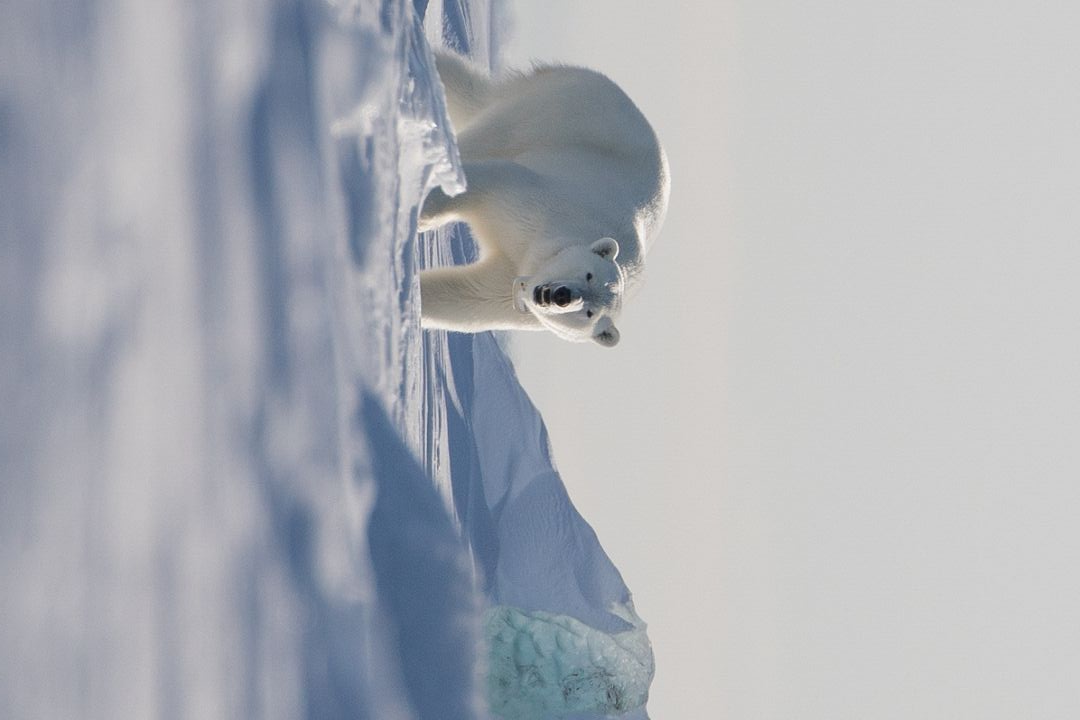

inference output rotated img:
image 1/1: 1080x720 1 bear
Speed: 1.9ms pre-process, 81.9ms inference, 0.6ms NMS per image at shape (1, 3, 640, 448)
        xmin        ymin        xmax       ymax  confidence  class  name
0  45.872654  415.826874  358.766968  668.13562    0.751393     21  bear


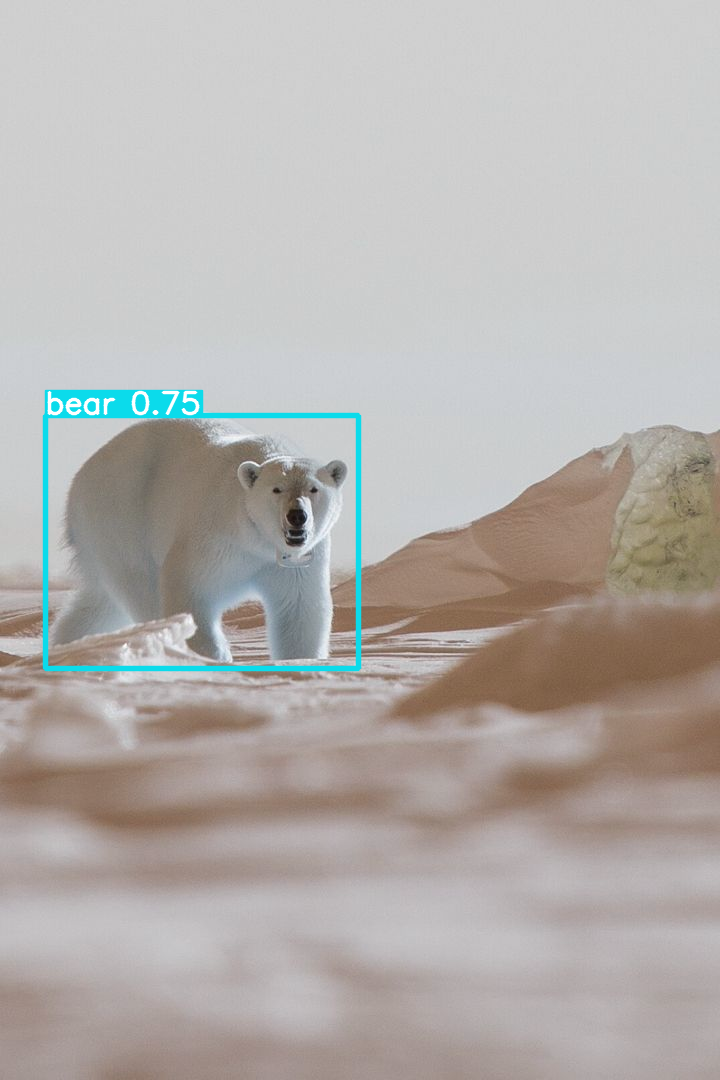

In [6]:
#insert bonus code here
import cv2

img = 'imgs/polar_bears.jpg'
rotated_img = cv2.rotate(cv2.imread(img), cv2.ROTATE_90_COUNTERCLOCKWISE)

with torch.no_grad():
   #Detecting objects using YOLOv5
    objs_img = model(img)
    objs_rotated_img = model(rotated_img)
    
    print('inference output img:')
    print(objs_img)
    print(objs_img.pandas().xyxy[0])
    objs_img.show()

    print('inference output rotated img:')
    print(objs_rotated_img)
    print(objs_rotated_img.pandas().xyxy[0])
    objs_rotated_img.show()

In [7]:
display_answer(hw2.answers.part6_bonus)


**Your answer:**

The original image we provided to the model was of a polar bear rotated 90 degrees to the right. As a result of this rotation, the model failed to detect or correctly classify the object. One possible reason for this is that models like YOLO are highly sensitive to the orientation of objects, as they are typically trained on images where objects are aligned in common orientations. The model likely has limited exposure to "non-standard" orientations, such as the rotated polar bear. To address this, we manipulated the image by rotating it 90 degrees to the left. This adjustment made the polar bear appear in its natural, more typical orientation, which led the model to successfully detect and classify the polar bear with a confidence score of 0.75.

